In [36]:
from graphviz import Digraph
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

In [37]:
data = pd.read_csv('PlayTennis.csv')
data["target"] = data['play']

In [38]:
le = LabelEncoder()

data_encoded = data.apply(le.fit_transform)
print(data_encoded.head())

   outlook  temp  humidity  windy  play  target
0        2     1         0      0     0       0
1        2     1         0      1     0       0
2        0     1         0      0     1       1
3        1     2         0      0     1       1
4        1     0         1      0     1       1


In [39]:
# Split the dataset into features (X) and target (y)
X = data_encoded.drop('play', axis=1)
y = data_encoded['play']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Initialize the Decision Tree Classifier with limited depth to avoid overfitting
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=4, min_samples_leaf=2)

In [42]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=4)

In [43]:
# Check the accuracy on the test set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [44]:
# Export the decision tree to a dot file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['no', 'yes'],
                           filled=True, rounded=True,
                           special_characters=True)

In [45]:
# Create a graph from the dot file
graph = graphviz.Source(dot_data)



In [46]:
# Render the graph
graph.render("decision_tree")

'decision_tree.pdf'

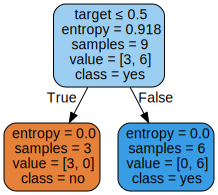

In [47]:
# Display the decision tree in the notebook
graph